# Load numpy images and mask:

In [20]:
# Loading
import numpy as np

In [21]:
# Data npy files
img1 = np.load('data/Fold 1/images/fold1/images.npy')
img2 = np.load('data/Fold 2/images/fold2/images.npy')
img3 = np.load('data/Fold 3/images/fold3/images.npy')

# Labels npy files
lbl1 = np.load('data/Fold 1/masks/fold1/masks.npy')
lbl2 = np.load('data/Fold 2/masks/fold2/masks.npy')
lbl3 = np.load('data/Fold 3/masks/fold3/masks.npy')

# Load challenge data
img4 = np.load('data/Challenge/images.npy')
lbl4 = np.load('data/Challenge/labels.npy')

In [22]:
# Filter out all cells except for Neutrophil cells:
lbl1 = lbl1[:, :, :, 1]
lbl2 = lbl2[:, :, :, 1]
lbl3 = lbl3[:, :, :, 1]
lbl4 = lbl4[:, :, :, 1]

In [23]:
# Convert all to .astype(np.uint8)
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
img3 = img3.astype(np.uint8)
img4 = img4.astype(np.uint8)

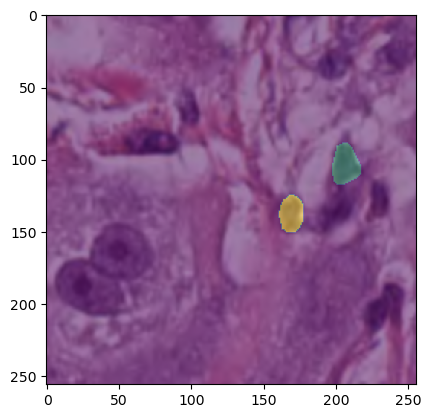

In [24]:
# Plot first image and label
import matplotlib.pyplot as plt
plt.imshow(img1[0])
plt.imshow(lbl1[0], alpha=0.5)
plt.show()

In [25]:
# Create binary masks for Neutrophil cells (class 1)
lbl4 = (lbl4 == 1).astype(np.uint16)

In [26]:
# Assuming images is a list of your images and labels is a list of your labels
filtered_images = []
filtered_labels = []

for i in range(len(img4)):
    # Check if the neutrophil mask contains any non-zero values (presence of neutrophil cells)
    if np.any(lbl4[i]):
        filtered_images.append(img4[i])
        filtered_labels.append(lbl4[i])

# Replace the original lists with the filtered lists
img4 = filtered_images
lbl4 = filtered_labels

In [35]:
img4 = np.array(img4)
lbl4 = np.array(lbl4)

In [36]:
print(f"Number of images: {len(img4)} and labels: {len(lbl4)}")

Number of images: 1218 and labels: 1218


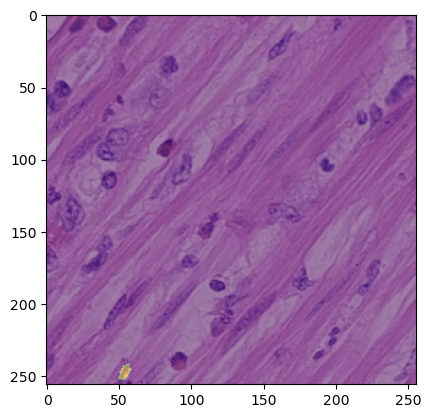

In [37]:
# First image of challenge data
plt.imshow(img4[1])
plt.imshow(lbl4[1], alpha=0.5)
plt.show()

In [38]:
# Convert labels to binary such that all cells are 255 and all other pixels are 0
lbl1 = (lbl1 > 0).astype(np.uint8)
lbl2 = (lbl2 > 0).astype(np.uint8)
lbl3 = (lbl3 > 0).astype(np.uint8)
lbl4 = (lbl4 > 0).astype(np.uint8)

In [39]:
# Multiply by 255 to get the correct pixel values
lbl1 = lbl1 * 255
lbl2 = lbl2 * 255
lbl3 = lbl3 * 255
lbl4 = lbl4 * 255

In [40]:
# unique values in the labels
print(np.unique(lbl1))
print(np.unique(lbl2))
print(np.unique(lbl3))
print(np.unique(lbl4))

[  0 255]
[  0 255]
[  0 255]
[  0 255]


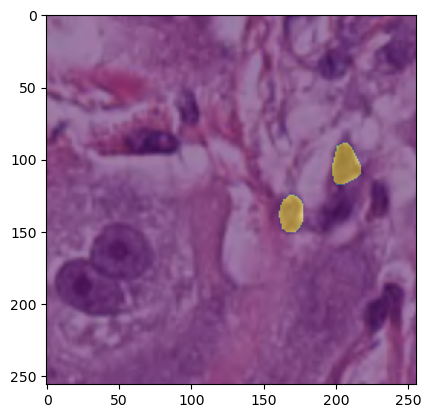

In [41]:
# Plot first image and label again
plt.imshow(img1[0])
plt.imshow(lbl1[0], alpha=0.5)
plt.show()

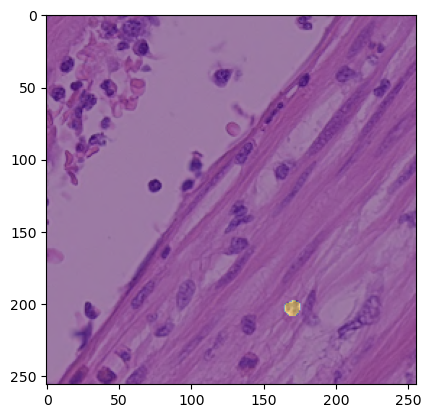

In [42]:
# Plot first image and label again
plt.imshow(img4[0])
plt.imshow(lbl4[0], alpha=0.5)
plt.show()

In [43]:
# Combine all data
img = np.concatenate((img1, img2, img3, img4), axis=0)
lbl = np.concatenate((lbl1, lbl2, lbl3, lbl4), axis=0)

In [44]:
# Check shape of data
print(img.shape)
print(lbl.shape)

(9119, 256, 256, 3)
(9119, 256, 256)


In [45]:
# Remove all images without any cells
img = img[lbl.sum((1, 2)) > 0]
lbl = lbl[lbl.sum((1, 2)) > 0]

In [46]:
# Check shape of data again
print(img.shape)
print(lbl.shape)

(5350, 256, 256, 3)
(5350, 256, 256)


In [47]:
# Save
import os
from PIL import Image

#Saves each label in a NumPy array to a specified folder as JPG.
def save_images(np_array, folder_path):
    # Check and create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Loop through each label in the NumPy array
    for i, img in enumerate(np_array):
        # Ensure the label array is in the correct format (uint8)
        if img.dtype != np.uint8:
            img = img.astype(np.uint8)

        # Create an label object and save it
        image = Image.fromarray(img)
        image.save(os.path.join(folder_path, f'image_{i}.jpg'))

In [48]:
# Save the images to a folder
save_images(img, 'data/dataset/train/images')

In [49]:
# Save the label to a folder
save_images(lbl, 'data/dataset/train/labels')